# Исследование продаж компьютерных игр

**Цель проекта**: 
анализ факторов, влияющих на уровень продажи игры, выявление наиболее популярных жанров и платформ для дальнейшего планирования рекламных кампаний. 

В нашем распоряжении следующие данные о продажах компьютерных игр за 2016 год:
-	Name — название игры
-	Platform — платформа
-	Year_of_Release — год выпуска
-	Genre — жанр игры
-	NA_sales — продажи в Северной Америке (миллионы проданных копий)
-	EU_sales — продажи в Европе (миллионы проданных копий)
-	JP_sales — продажи в Японии (миллионы проданных копий)
-	Other_sales — продажи в других странах (миллионы проданных копий)
-	Critic_Score — оценка критиков (максимум 100)
-	User_Score — оценка пользователей (максимум 10)
-	Rating — рейтинг от организации ESRB.


**Основные этапы проекта**:
- Изучение предоставленных данных
- Очистка и предобработка данных
- Предварительные расчёты: суммарные продажи во всех регионах
- Анализ данных:
    - анализ объемов продаж по годам
    - анализ жизненного цикла игровых платформ
    - выявление наиболее популярных и перспективных игровых платформ
    - анализ взаимосвязи между объемом продаж и оценками критиков и пользователей
    - анализ продаж в разрезе жанров
    - анализ региональных продаж в разрезе платформ и жанров, оценка взаимосвязи продаж с рейтингом ESRB
    - проверка гипотез
- Общий вывод и рекомендации

## Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

games = pd.read_csv('/games.csv')
print(games.info())
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Вывод
В предоставленной таблице 16 715 строк. С первого взгляда обнаруживаются следующие проблемы: пропуски в столбцах с названием платформы, годом релиза, жанром, оценками от критиков и пользователей, рейтингом от организации ESRB. Помимо этого, необходимо привести к целочисленному типу столбцы с годом релиза и оценкой критиков, а столбец с оценкой пользователей - к типу float. 

## Предобработка данных

Сперва приведём к нижнему регистру названия столбцов:

In [2]:
games.columns = games.columns.str.lower()
games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


Теперь рассмотрим подробнее столбец с **названием игры**. В этом столбце есть 2 пропуска, посмотрим на эти строки:

In [3]:
games.loc[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти безымянные игры выпущены в 1993 году, не имеют рейтингов, продажи были небольшими, их можно удалить: 

In [4]:
games.dropna(subset = ['name'], inplace = True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Посмотрим, какие вообще игры представлены в таблице, и есть ли среди них дубликаты:

In [5]:
games['name'].value_counts()

Need for Speed: Most Wanted                              12
FIFA 14                                                   9
Ratatouille                                               9
LEGO Marvel Super Heroes                                  9
Madden NFL 07                                             9
                                                         ..
The Amazing Spider-Man (DS & Mobile Versions)             1
Mobile Suit Gundam Age: Universe Accel / Cosmic Drive     1
Sonic Rivals                                              1
UNO / Skip-Bo / UNO Freefall                              1
Aliens: Infestation                                       1
Name: name, Length: 11559, dtype: int64

Многие названия игр встречаются неоднократно. Проверим, не дубликаты ли это.

In [6]:
games.duplicated().sum()

0

In [7]:
games.query('name == "Need for Speed: Most Wanted"') # на примере игры, которая встречается чаще всего

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Явных дубликатов в таблице нет, одна и та же игра выходила на разных платформах в разные годы - отсюда и повторные названия в столбце.

Рассмотрим столбец с информацией о **платформе**:

In [8]:
games['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Проблем с наименованиями платформ не обнаружено, скрытых дубликатов в данном столбце нет. 

Перейдём к столбцу с **датой релиза** и прежде всего рассмотрим пропуски:

In [9]:
games.loc[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В этом столбце 269 пропусков, или 1,6%. В принципе, такой долей данных можно пренебречь. Однако, поскольку данные о релизах находятся в открытом доступе, можно вручную заполнить дату выхода игр со значительными продажами (например, свыше 1 млн. копий):

In [10]:
games.loc[games['year_of_release'].isna()].query(
    'na_sales >= 1' or 'eu_sales >= 1' 
    or 'jp_sales >= 1' or 'other_sales >= 1')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN


In [11]:
games.loc[183, ['year_of_release']] = 2003 # Madden NFL 2004
games.loc[456, ['year_of_release']] = 2008 # LEGO Batman: The Videogame
games.loc[475, ['year_of_release']] = 2005 # wwe Smackdown vs. Raw 2006
games.loc[609, ['year_of_release']] = 1980 # Space Invaders
games.loc[627, ['year_of_release']] = 2007 # Rock Band для X360
games.loc[657, ['year_of_release']] = 2001 # Frogger's Adventures: Temple of the Frog
games.loc[678, ['year_of_release']] = 2008 # LEGO Indiana Jones: The Original Adventures
games.loc[719, ['year_of_release']] = 2006 # Call of Duty 3
games.loc[805, ['year_of_release']] = 2007 # Rock Band для Wii
games.loc[1506, ['year_of_release']] = 1979 # Adventure
games.loc[1585, ['year_of_release']] = 1977 # Combat

Для многих игр пропущены значения года релиза для какой-то конкретной платформы при том, что известен год релиза для других платформ. Думаю, не будет большой ошибкой заполнить такие пропуски исходя из известного года релиза:

In [12]:
# заполняем пропуски медианой по известным данным
games['year_of_release'] = games.groupby('name')['year_of_release'].apply(
    lambda x: x.fillna(x.median()))

c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepd

c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepd

c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepd

In [13]:
games.loc[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1984,Legacy of Kain: Soul Reaver,PS,NaN,Action,0.58,0.40,0.00,0.07,91.0,9,T
2010,Donkey Kong Land III,GB,NaN,Platform,0.68,0.31,0.00,0.04,NaN,NaN,NaN
2106,Air-Sea Battle,2600,NaN,Shooter,0.91,0.06,0.00,0.01,NaN,NaN,NaN
2108,Suikoden III,PS2,NaN,Role-Playing,0.29,0.23,0.38,0.08,86.0,7.7,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


У нас осталось 138 пропусков, или 0,83% от общего числа данных. Удалим их из таблицы и приведём столбец к целочисленному типу:

In [14]:
games.dropna(subset = ['year_of_release'], inplace = True)        
games['year_of_release'] = games['year_of_release'].astype(int)  
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16575 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16575 non-null  object 
 1   platform         16575 non-null  object 
 2   year_of_release  16575 non-null  int32  
 3   genre            16575 non-null  object 
 4   na_sales         16575 non-null  float64
 5   eu_sales         16575 non-null  float64
 6   jp_sales         16575 non-null  float64
 7   other_sales      16575 non-null  float64
 8   critic_score     8080 non-null   float64
 9   user_score       9939 non-null   object 
 10  rating           9873 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


Рассмотрим, какие значения принимает столбец с **жанром** игры:

In [15]:
games['genre'].value_counts()

Action          3343
Sports          2333
Misc            1739
Role-Playing    1484
Shooter         1311
Adventure       1296
Racing          1236
Platform         879
Simulation       860
Fighting         843
Strategy         678
Puzzle           573
Name: genre, dtype: int64

Скрытых дубликатов нет. 

В столбцах с данными о **продажах по регионам** нет пропусков, они хранятся в нужном нам формате float, поэтому их обрабатывать не требуется.

Перейдём к столбцу с **оценкой критиков**:

In [16]:
games['critic_score'].describe()

count    8080.000000
mean       69.001114
std        13.925140
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Минимальные и максимальные значения в норме - не ниже 0 и не более 100. Однако в этом столбце очень много пропусков: 51% не заполнено. Проверим, зависит ли наличие оценок от года релиза:

In [17]:
games.loc[games['critic_score'].isna()]['year_of_release'].value_counts()

2009    776
2010    758
2008    716
2011    646
2007    506
2006    388
2015    381
1998    351
2012    334
2014    320
1999    300
2005    285
2013    272
1997    272
2016    270
1996    255
1995    219
2000    208
2002    203
2004    203
2003    191
2001    156
1994    120
1993     60
1981     46
1992     42
1991     41
1982     36
1986     21
1989     17
1983     17
1987     16
1990     16
1984     14
1988     14
1985     13
1980     10
1979      1
1977      1
Name: year_of_release, dtype: int64

Нет, даже для многих свежих игр отсутствует оценка критиков. Рассмотрим пропуски на примере игры Need for Speed: Most Wanted, которая в таблице встречается чаще других:

In [18]:
games.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Как можно видеть, оценка критиков, пользователей и даже рейтинг неодинаковы для разных платформ, поэтому заполнять пропуски исходя из имеющихся данных было бы некорректным. Поскольку минимальное значение дейсвительно выставленной оценки в нашей таблице - 13, можно заменить пропуски в этом столбце на 0, в дальнейшем при анализе будем иметь в виду, что 0 - отсутствующие значения. 

In [19]:
games['critic_score'] = games['critic_score'].fillna(0)
games['critic_score'] = games['critic_score'].astype(int)

Столбец с **оценкой пользователей**:

In [20]:
games['user_score'].describe()

count     9939
unique      96
top        tbd
freq      2395
Name: user_score, dtype: object

In [21]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2001,Adventure,2.15,0.18,0.0,0.07,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,0,tbd,E


Значение "tbd" - "to be determined", означает, что оценка ещё не определена. Заменим эти значения на явно завышенные - например, 20 (при том, что максимум - 10 баллов). Пропущенные значения также заменим на явно завышенные: 30, например.

In [22]:
games.loc[games['user_score'] == 'tbd', ['user_score']] = 20 # меняем tbd на 20
games['user_score'] = games['user_score'].fillna(30)         # меняем NAN на 30
games['user_score'].value_counts()

30     6636
20     2395
7.8     324
8       288
8.2     280
       ... 
0.7       2
1.1       2
0.2       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

Поскольку оценки выставлены с точностью до десятых, заменим тип данных в столбце на float:

In [23]:
games['user_score'] = games['user_score'].astype(float)
games['user_score'].describe()

count    16575.000000
mean        18.143735
std         10.633130
min          0.000000
25%          7.600000
50%         20.000000
75%         30.000000
max         30.000000
Name: user_score, dtype: float64

У нас остался столбец с **рейтингом от организации ESRB**. Посмотрим, какие значения он принимает и какие строки содержат пропуски:

In [24]:
games['rating'].value_counts()

E       3959
T       2934
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

In [25]:
games.loc[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,30.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,30.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,30.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,30.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0,30.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,30.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,30.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,30.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,30.0,NaN


6 702 пропуска - это 40% от всех данных, причём игры не рейтинговались в разные годы. Удалить эти строки - значит лишиться большой части данных, заменить их из имеющихся не представляется возможным, поэтому заменим их на 'NAN'.

In [26]:
games['rating'] = games['rating'].fillna('NAN')

Посмотрим, как теперь выглядит информация в нашей таблице:

In [27]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16575 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16575 non-null  object 
 1   platform         16575 non-null  object 
 2   year_of_release  16575 non-null  int32  
 3   genre            16575 non-null  object 
 4   na_sales         16575 non-null  float64
 5   eu_sales         16575 non-null  float64
 6   jp_sales         16575 non-null  float64
 7   other_sales      16575 non-null  float64
 8   critic_score     16575 non-null  int32  
 9   user_score       16575 non-null  float64
 10  rating           16575 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


### Вывод

В рамках предобработки данных выполнено следующее:
- данные проверены на явные и скрытые дубликаты;
- удалены пропуски в столбцах с названием игры и годом релиза;
- частично восстановлены пропущенные данные о годе релиза игры;
- тип данных изменён с столбцах с годом релиза и оценкой критиков (на целочисленный), оценкой пользователей (на float);
- пропуски в данных с оценками критиков и пользователей заменены на значения-маркеры;
- пропуски в рейтинге ESRB заменены на текстовый 'NAN'.

После выполненой обработки удалось сохранить 99% первоначальных данных.

## Расчёты и добавление результатов в таблицу

Посчитаем суммарные продажи во всех регионах и выведем их отдельным столбцом:

In [28]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] 
+ games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,30.0,NAN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,30.0,NAN,31.38


In [29]:
games['total_sales_1'] = games[['na_sales', 'eu_sales', 
                                'jp_sales', 'other_sales']].sum(axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_1
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,30.0,NAN,40.24,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,30.0,NAN,31.38,31.38


In [30]:
games['total_sales_2'] = games.filter(like='sales').sum(axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_1,total_sales_2
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54,82.54,247.62
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,30.0,NAN,40.24,40.24,120.72
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52,35.52,106.56
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77,32.77,98.31
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,30.0,NAN,31.38,31.38,94.14


## Исследовательский анализ данных

Посмотрим, **сколько игр было выпущено в разные годы**:

,year_of_release,total_sales
0,1977,1
1,1979,1
2,1980,10
3,1981,46
4,1982,36
5,1983,17
6,1984,14
7,1985,14
8,1986,21
9,1987,16


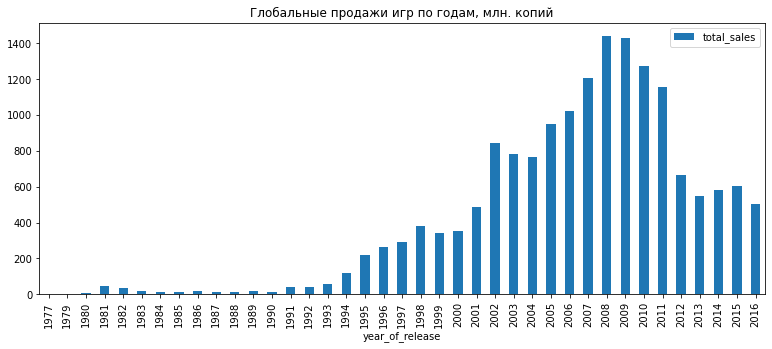

In [31]:
pivot_years = games.pivot_table(index = 'year_of_release', 
                                values = 'total_sales', 
                                aggfunc = 'count').reset_index()
display(pivot_years)
pivot_years.plot('year_of_release', 'total_sales', 
                 kind = 'bar', 
                 figsize = (13,5), 
                 title = 'Глобальные продажи игр по годам, млн. копий')
plt.show()

Как видно из таблицы и графика, до 1994 года количество выпускаемых за год игр было незначительным, рост начался с 1994 года, игровой бум приходится на период с 2006 по 2011 год с пиком в 2008 году, уже в 2012 году количество игр, выпущенных за год,  снижается почти в 2 раза по сравнению с 2011 годом, и остаётся примерно на одном уровне до конца исследования (2016 год). Снижению количества игр после 2008 года способствовали многие факторы, в том числе мировой финансовый кризис 2008 года и развитие рынка игр для мобильных устройств.

---
**Проанализируем платформы с наибольшим количеством продаж**:

In [32]:
pivot_platform = games.pivot_table(index = ['platform'], 
                                   values = 'total_sales', 
                                   aggfunc = 'sum')
pivot_platform_top = pivot_platform.sort_values(by = 'total_sales', 
                                                ascending = False).head(10)
pivot_platform_top

,total_sales
platform,
PS2,1251.28
X360,969.08
PS3,936.81
Wii,905.40
DS,804.28
PS,727.58
GBA,316.13
PS4,314.14
PSP,293.57


Построим распределение продаж по годам для каждой из платформ:

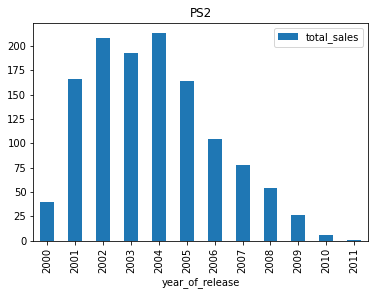

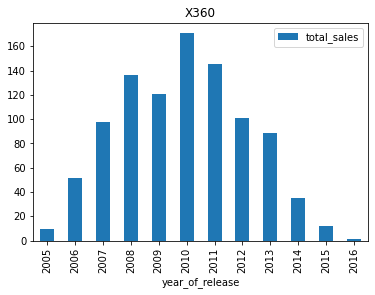

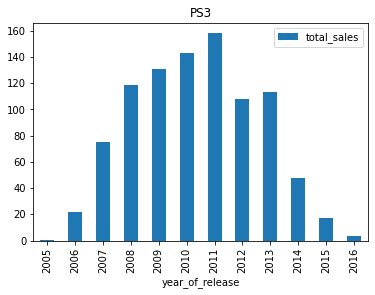

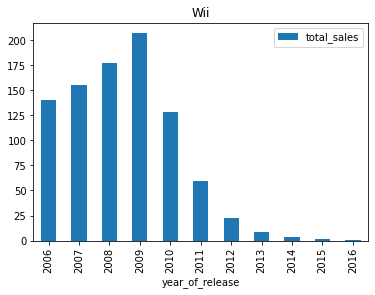

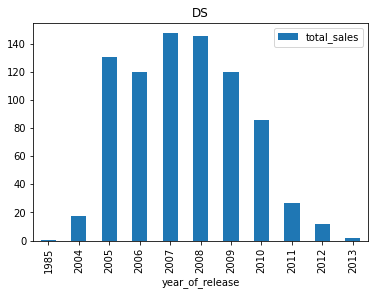

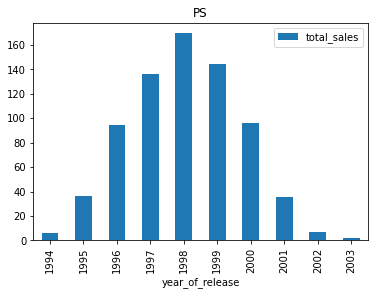

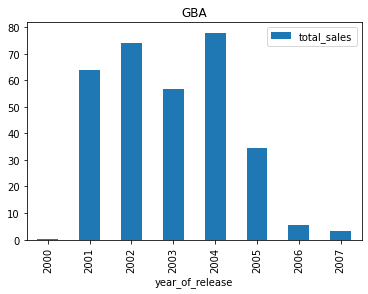

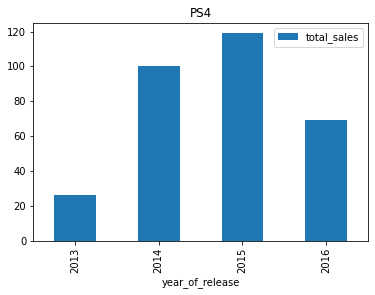

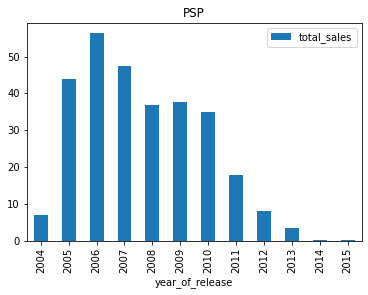

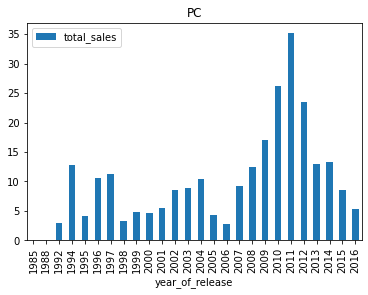

In [33]:
# для каждой платформы соберём статистику по годам:
for row in pivot_platform_top.index:
    # для каждой платформы делаем срез и строим сводную таблицу:
    platform_data = games.query('platform == @row')
    platform_year = platform_data.pivot_table(index = 'year_of_release', 
                                              values = 'total_sales', 
                                              aggfunc = 'sum').reset_index()
        
    # строим графики:
    platform_year.plot('year_of_release', 'total_sales', 
                       kind = 'bar', 
                       figsize = (6,4))
    plt.title(row)

По графикам можно сделать вывод, что средний "срок жизни" платформы - около 10 лет. Например, игры под PlayStation выпускались с 1994 по 2003 год, затем её полностью заменила PlayStation2 (с 2000 по 2011 год), затем PlayStation3 (с 2005 по 2016 год), которую в настоящее время теснит PlayStation4, выпущенная в 2013 году. Похожие параметры у распределений консолей PlayStation Portable (2004-2015), Nintendo GBA (2000-2007), Nintendo Wii (2006-2016), Xbox 360 (2005-2016), Nintendo DS (2004-2013, есть также данные о 1985, но это явная ошибка - консоль была выпущена в 2004 году). Из общей тенденции выбивается только PC - персональный компьютер, игры под который выпускаются с 1992 по настоящее время.

---
В дальнейшем для анализа будем рассматривать данные, **начиная с 2012 года**, поскольку текущая тенденция продаж сохраняется именно с этого времени. Картина продаж до 2011 года существенно отличается, поэтому эти данные предлагается не рассматривать. 

In [34]:
games_actual = games.query('year_of_release >= 2012')
games_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_1,total_sales_2
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,21.05,63.15
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,16.27,48.81
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,30.0,NAN,14.63,14.63,43.89
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,30.0,NAN,14.60,14.60,43.80
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79,13.79,41.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,30.0,NAN,0.01,0.01,0.03
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,30.0,NAN,0.01,0.01,0.03
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,30.0,NAN,0.01,0.01,0.03
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,30.0,NAN,0.01,0.01,0.03


Посмотрим, **какие платформы лидируют по продажам**:

In [35]:
pivot_platform_act = games_actual.pivot_table(index = 'platform', 
                                              values = 'total_sales', 
                                              aggfunc = 'sum')
pivot_platform_act['%'] = ((pivot_platform_act['total_sales'] / 
                            pivot_platform_act['total_sales'].sum())*100).round(2)
pivot_platform_act.sort_values(by = 'total_sales', ascending = False)

,total_sales,%
platform,,
PS4,314.14,21.63
PS3,289.71,19.95
X360,237.52,16.36
3DS,195.01,13.43
XOne,159.32,10.97
WiiU,82.19,5.66
PC,63.51,4.37
PSV,49.18,3.39
Wii,36.60,2.52


За 2012-2016 год лидер рынка - Sony с приставками PlayStation, на которые пришлось 46% всех продаж. У XBox - 27%, Nintendo - 23%, игры под ПК - 4%. 

Посмотрим, какие платформы ещё будут расти, а какие уже на спаде популярности:

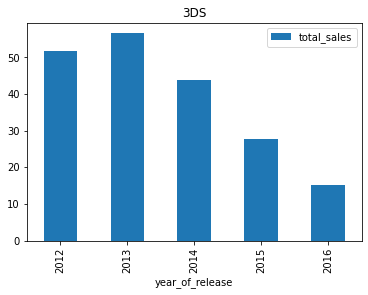

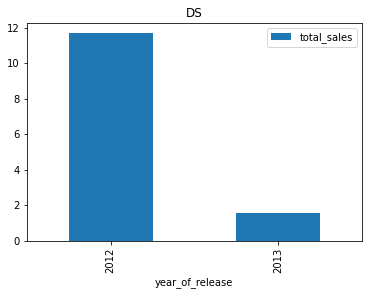

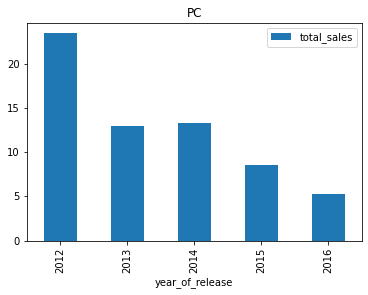

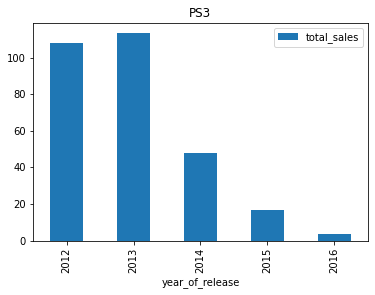

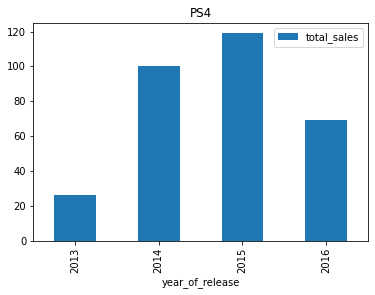

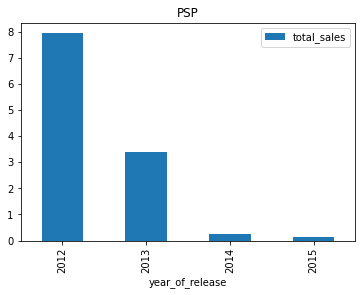

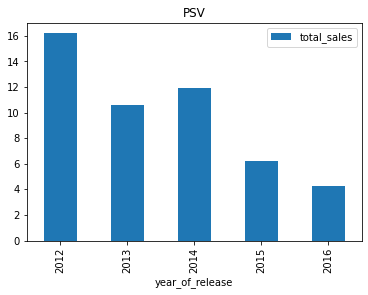

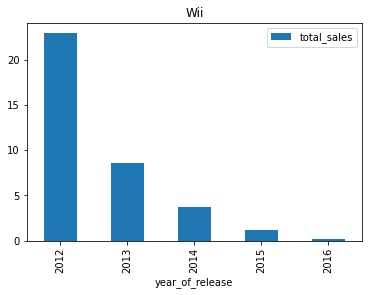

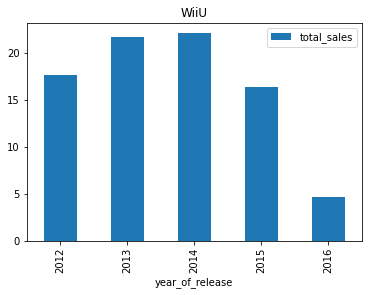

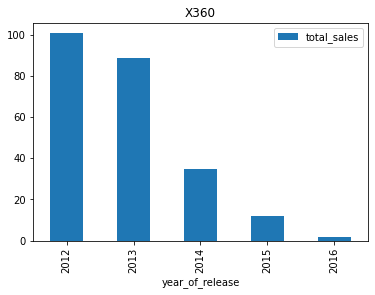

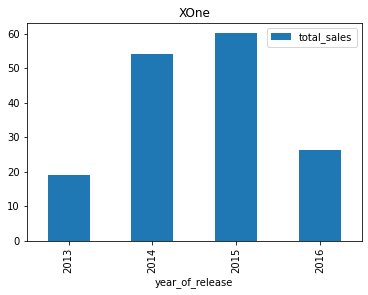

In [36]:
for row in pivot_platform_act.index:
    # для каждой платформы делаем срез и строим сводную таблицу:
    platform_act_data = games_actual.query('platform == @row')
    platform_act_year = platform_act_data.pivot_table(index = 'year_of_release', 
                                                      values = 'total_sales', 
                                                      aggfunc = 'sum').reset_index()
    
    # строим графики:
    platform_act_year.plot('year_of_release', 'total_sales', 
                           kind = 'bar', 
                           figsize = (6,4))
    plt.title(row)

По графикам видно, что ни одна платформа в 2016 году не находилась непосредственно в стадии роста, однако потенциально прибыльными остаются Nintendo 3DS, Sony PlayStation 4 (лидирует и вероятно, в 2017 году будет лидером рынка), Sony PlayStation Vita, Nintendo WiiU, Xbox One и ПК. Завершают или уже завершили свой жизненный цикл: Xbox 360, Nintendo Wii, Sony PlayStation Portable, Sony PlayStation 3, Nintendo DS. 

Проанализируем распределения продаж для каждой платформы:

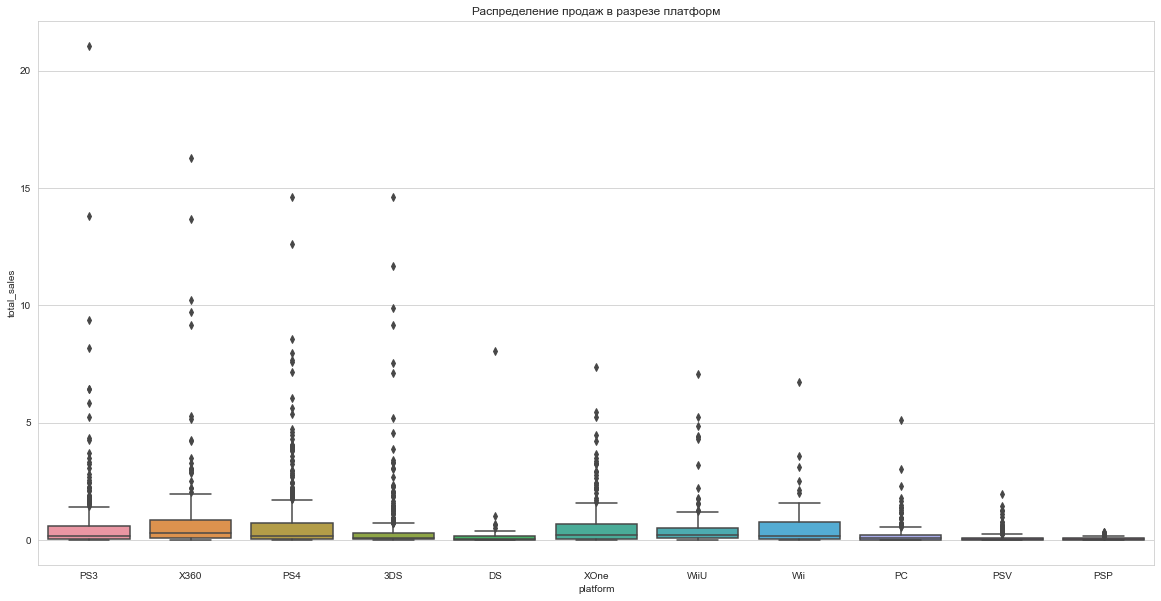

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.boxplot(x = games_actual['platform'], 
            y = games_actual['total_sales']).set_title("Распределение продаж в разрезе платформ")
plt.show()

Графики подтверждают полученную ранее статистику по наиболее популярным платформам: это первые 4 бокса.
Видно, что все распределения имеют длинные хвосты и отличаются большим количеством выбросов: основная масса игр продаётся в количестве не более 1 млн. экземпляров, однако на рынке существуют очень популярные игры, которые расходятся тиражом свыше 15 и даже 20 млн. копий. 
Посмотрим, что это за игры: 

In [38]:
games_actual.query('total_sales > 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_1,total_sales_2
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,21.05,63.15
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,16.27,48.81
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,30.0,NAN,14.63,14.63,43.89
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,30.0,NAN,14.60,14.60,43.80
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79,13.79,41.37
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68,13.68,41.04
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,12.62,37.86
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,30.0,NAN,11.68,11.68,35.04
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24,10.24,30.72


Поскольку выше график не очень нагляден из-за больших выбросов, ограничим ось Y:

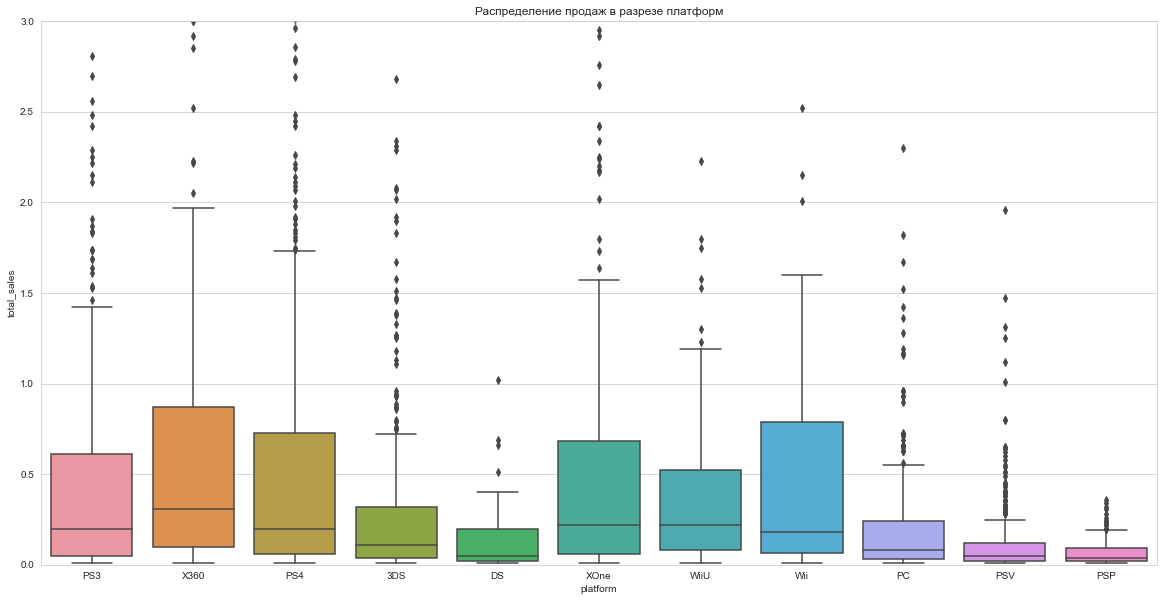

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
plt.ylim(0, 3)
sns.boxplot(x = games_actual['platform'], 
            y = games_actual['total_sales']).set_title("Распределение продаж в разрезе платформ")
plt.show()

Несмотря на то, что у Sony в целом продаж больше, по графику можно видеть, что в среднем игры для XBox расходятся большим тиражом, чем для платформ других производителей. Самые низкие медианные продажи  - у Nintendo DS, Sony PlayStation Vita, Sony PlayStation Portable - менее 200 тыс. Однако, из этих трёх "аутсайдеров" можно выделить PlayStation Vita: у этой платформы есть продажи почти до 2 млн. экзмепляров и достаточно много продаж в диапазоне от 250 тыс. до 1,5 млн. копий.

Теперь рассмотрим на примере одной платформы, **влияют ли на продажи отзывы критиков и пользователей**. Рассматривать будем лидера за последние годы - Sony PlayStation 4. Напомним, что мы приняли в качестве индикатора пропуска в оценке критиков - 0, в оценке пользователей - 20 и 30. Отфильтруем таблицу и оставим только строки с реальными оценками:

In [40]:
games_PS4 = games_actual.query('platform == "PS4" and critic_score > 0 and user_score < 20')
games_PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_1,total_sales_2
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,12.62,37.86
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58,8.58,25.74
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66,7.66,22.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60,7.60,22.80
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17,7.17,21.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42,2.3,E10+,0.01,0.01,0.03
16499,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70,6.8,T,0.01,0.01,0.03
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69,7.5,NAN,0.01,0.01,0.03
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01,0.01,0.03


Построим диаграмму рассеяния и посчитаем корреляцию между продажами и оценкой критиков:

Коэффициент коррелляции между оценкой критиков и продажами: 0.41


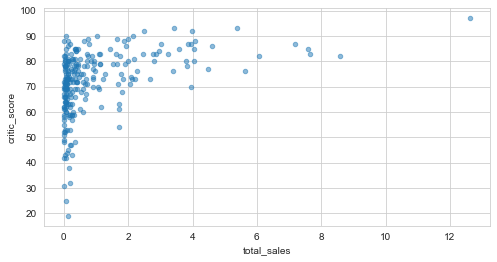

In [41]:
games_PS4.plot(x = 'total_sales', 
               y = 'critic_score', 
               kind = 'scatter', 
               grid = True, 
               alpha = 0.5, 
               figsize = (8,4))
print('Коэффициент коррелляции между оценкой критиков и продажами:', games_PS4['critic_score'].corr(games_PS4['total_sales']).round(2))

Зависимость между оценкой и продажами дейтствительно есть, но она достаточно слабая (коэффициент кореляции равен 0,41): есть множество игр, получивших высокую оценку от критиков, продажи которых не превзошли даже 300 тыс. экземпляров. В то же время мы видим, что действительно популярные игры, продажи которых для PS4 начинаются от 2 млн. копий, получают высокие оценки - не менее 70 баллов из 100. Самая популярная из оцененных игр  -  Grand Theft Auto V, продажи которой составили 12,6 млн. копий, получила от критиков 97 баллов. 

Построим аналогичный график для продаж и оценок пользователей:

Коэффициент коррелляции между оценкой пользователей и продажами: -0.03


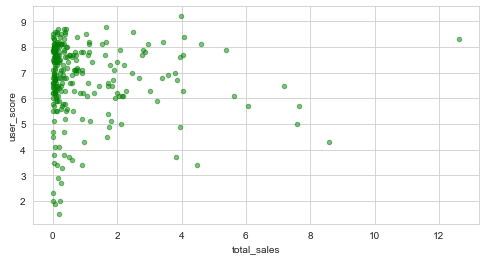

In [42]:
games_PS4.plot(x = 'total_sales', y = 'user_score', 
               kind = 'scatter', 
               grid = True, 
               alpha = 0.5, 
               color = 'green', 
               figsize = (8,4))
print('Коэффициент коррелляции между оценкой пользователей и продажами:', 
      games_PS4['user_score'].corr(games_PS4['total_sales']).round(2))

Коэффициент корреляции -0,03 говорит о том, что связи между оценками пользователей и продажами игр нет. По графику видно, что, как и в случае с оценками критиков, большинство игр, получивших высокую оценку пользователей, продавались в количестве менее 300 тыс. Но если в случае с оценками критиков, популярыне игры оценивались ими по достоинству, то в случае с пользователями это не так: , проданные в количестве от 4 до 9 млн. экземпляров, оценивались пользователями зачастую ниже, чем игры, чьи продажи не превысили 2 млн. копий. Так что высокая оценка пользователей - вовсе не признак популярности игры.

Посмотрим аналогичные метрики для платформы конкурента - XBox 360:

Коэффициент коррелляции между оценкой критиков и продажами: 0.36
Коэффициент коррелляции между оценкой пользователей и продажами: -0.0


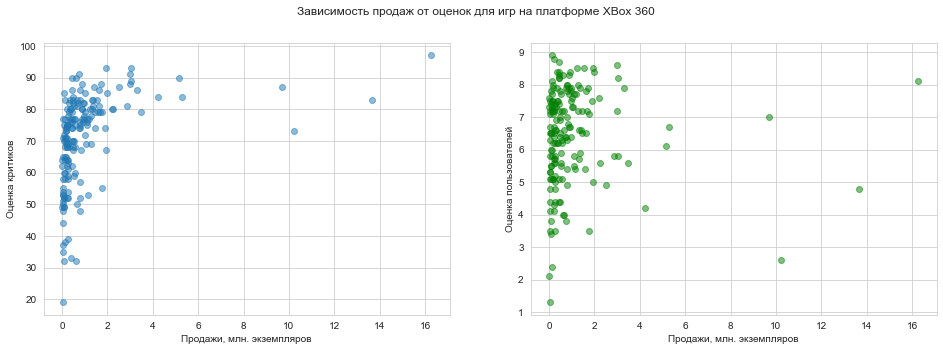

In [43]:
games_X360 = games_actual.query('platform == "X360" and critic_score > 0 and user_score < 20')

print('Коэффициент коррелляции между оценкой критиков и продажами:', 
      games_X360['critic_score'].corr(games_X360['total_sales']).round(2))
print('Коэффициент коррелляции между оценкой пользователей и продажами:', 
      games_X360['user_score'].corr(games_X360['total_sales']).round(2))

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
axes[0].scatter(games_X360['total_sales'], 
                games_X360['critic_score'], alpha = 0.5)
axes[1].scatter(games_X360['total_sales'], games_X360['user_score'], 
                alpha = 0.5, color = 'green')

axes[0].set_xlabel('Продажи, млн. экземпляров')
axes[0].set_ylabel('Оценка критиков')
axes[1].set_xlabel('Продажи, млн. экземпляров')
axes[1].set_ylabel('Оценка пользователей')
fig.suptitle('Зависимость продаж от оценок для игр на платформе XBox 360')

plt.show()

In [44]:
games_X360[['critic_score', 'total_sales', 'user_score']].corr()

,critic_score,total_sales,user_score
critic_score,1.000000,0.360266,0.557952
total_sales,0.360266,1.000000,-0.002257
user_score,0.557952,-0.002257,1.000000


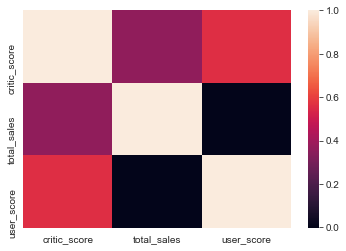

In [45]:
sns.heatmap(games_X360[['critic_score', 'total_sales', 'user_score']].corr())
plt.show()

Картина аналогична той, что мы увидели для PS4. 

Расссмотрим **глобальные продажи игр в разрезе жанров**:

In [46]:
pivot_genre_act = games_actual.pivot_table(index = 'genre', 
                                           values = 'total_sales', aggfunc = 'sum')
pivot_genre_act['%'] = ((pivot_genre_act['total_sales'] / 
                         pivot_genre_act['total_sales'].sum())*100).round(2)
pivot_genre_act.sort_values(by = 'total_sales', ascending = False)

,total_sales,%
genre,,
Action,446.41,30.74
Shooter,304.75,20.99
Role-Playing,192.80,13.28
Sports,181.07,12.47
Misc,85.28,5.87
Platform,61.00,4.20
Racing,53.50,3.68
Fighting,44.49,3.06
Simulation,35.12,2.42


Наиболее продаваемые жанры: экшн (31%), шутер (21%), ролевые (13%) и спортивные игры (13%). На остальные жанры приходится в сумме менее 22% всех продаж с 2012 по 2016 год. Посмотрим на распределения продаж внутри каждого жанра:

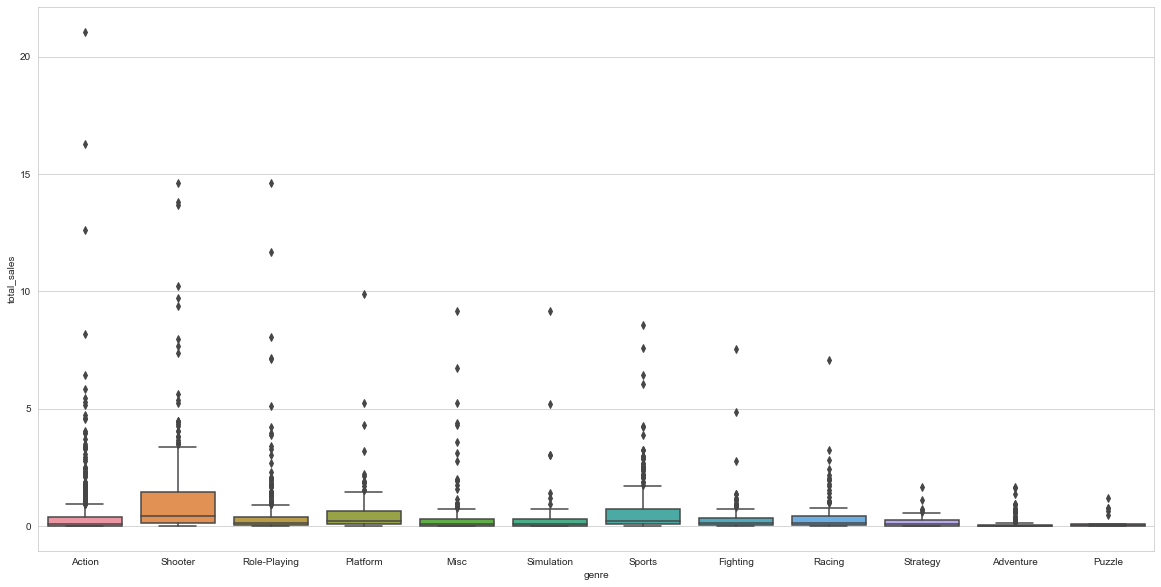

In [47]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.boxplot(x = games_actual['genre'], y = games_actual['total_sales'])
plt.show()

Несмотря на то, что жанр экшн принёс более 30% продаж за анализируемый период, на это скорее влияют отдельные супер-популярные игры, которые продаются тиражом более 10 млн. копий. А в среднем гораздо лучше продаются "игры-стрелялки", просто среди них меньше "звёзд" с огромными продажами.
Самые низкие продажи - у стратегий, приключений и головоломок.

Определим **самые популярные платформы для каждого региона** и выведем для каждой платформы долю соответствующего рынка:

In [48]:
pivot_platform_reg = games_actual.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')

# вычислим долю от рынка для каждой платформы:
pivot_platform_reg['eu_sales'] = ((pivot_platform_reg['eu_sales'] / 
                                   pivot_platform_reg['eu_sales'].sum())*100).round(2)
pivot_platform_reg['jp_sales'] = ((pivot_platform_reg['jp_sales'] / 
                                   pivot_platform_reg['jp_sales'].sum())*100).round(2)
pivot_platform_reg['na_sales'] = ((pivot_platform_reg['na_sales'] / 
                                   pivot_platform_reg['na_sales'].sum())*100).round(2)

pivot_platform_reg

,eu_sales,jp_sales,na_sales
platform,,,
3DS,8.41,45.53,9.35
DS,0.74,1.93,0.83
PC,7.54,0.00,3.25
PS3,21.07,18.30,17.49
PS4,27.71,8.28,18.33
PSP,0.10,5.55,0.04
PSV,2.23,10.91,1.85
Wii,2.42,1.76,3.06
WiiU,4.94,6.75,6.42


Как видно из сводной таблицы, предпочтения игроков в Северной Америке, Европе и Японии сильно отличаются. 
* В Северной Америке примерно равная доля у местного XBox и японских Sony (40% и 38% соответственно), доля приставок Nintendo - около 19%, игры под ПК - 3%. 
* В Европе более 50% рынка принадлежит Sony с её PlayStation, на втором месте с 25% - XBox, доля Nintendo - 17%, зато игры под ПК более популярны - 7,5%. 
* в Японии ситуация кардинально отличается: более 55% рынка занимает местная компания Nintendo со своими платформами, у Sony - 44%, у XBox - чуть больше 1% всех продаж, а на ПК не играет практически никто.

Определим **самые популярные жанры для каждого региона** и выведем долю соответствующего рынка:

In [49]:
pivot_genre_reg = games_actual.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')

# вычислим долю от рынка для каждой платформы:
pivot_genre_reg['eu_sales'] = ((pivot_genre_reg['eu_sales'] / 
                                pivot_genre_reg['eu_sales'].sum())*100).round(2)
pivot_genre_reg['jp_sales'] = ((pivot_genre_reg['jp_sales'] / 
                                pivot_genre_reg['jp_sales'].sum())*100).round(2)
pivot_genre_reg['na_sales'] = ((pivot_genre_reg['na_sales'] / 
                                pivot_genre_reg['na_sales'].sum())*100).round(2)

display(pivot_genre_reg.loc[:, ['eu_sales', 'na_sales']].sort_values(by = 'eu_sales', ascending = False).head(6))
display(pivot_genre_reg.loc[:, ['jp_sales']].sort_values(by = 'jp_sales', ascending = False).head(5))

,eu_sales,na_sales
genre,,
Action,31.76,30.36
Shooter,22.28,24.40
Sports,13.57,13.74
Role-Playing,9.53,10.79
Racing,5.36,2.90
Misc,5.17,6.44


,jp_sales
genre,
Role-Playing,33.94
Action,27.38
Misc,6.79
Simulation,5.40
Fighting,4.90


И снова мы видим, что предпочтения японцев сильно отличаются от европейцев и американцев. Если в Америке и Европе топ-5 жанров выглядит примерно одинаково, за исключением 5го места (в Европе - гонки, в Америке - жанр misc), то у Японцев первую строчку занимают ролевые игры с долей почти 34%, тогда как в Европе и Америке у них 9,5% и 11% соответственно. Также в Японии достаточно популярны симуляции и рукопашный бой, которые в Европе и Америке в топ-5 вообще не входят. Однако жанр экшн одинаково популярен во всех регионах: у него около 30% каждого рынка. 

Посмотрим, **влияет ли рейтинг ESRB на продажи в каждом регионе**:

In [50]:
pivot_rating_reg = games_actual.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')

# в процентах:
pivot_rating_reg['eu_sales'] = ((pivot_rating_reg['eu_sales'] / 
                                 pivot_rating_reg['eu_sales'].sum())*100).round(2)
pivot_rating_reg['jp_sales'] = ((pivot_rating_reg['jp_sales'] / 
                                 pivot_rating_reg['jp_sales'].sum())*100).round(2)
pivot_rating_reg['na_sales'] = ((pivot_rating_reg['na_sales'] / 
                                 pivot_rating_reg['na_sales'].sum())*100).round(2)

pivot_rating_reg

,eu_sales,jp_sales,na_sales
rating,,,
E,22.20,14.69,19.28
E10+,11.24,4.25,13.14
M,38.19,10.99,39.05
NAN,17.97,56.57,17.41
T,10.40,13.49,11.13


И снова Япония отличается от Европы и Америки: в Японии в 56,5% случаев игре вообще не присвоен рейтинг, тогда как в Европе и Аерике не рейтинговано менее 18% игр. В Америке и Европе доля игр, разрешённых в любом возрасте - 19% и 22% соответственно, доля игр с маркировкой 18+ - 39% и 38% соответственно, с маркировкой 10+ и 13+ - 24% и 22% соответстенно. Таким образом, можно говорить о том, что в Европе и Америке больше продаётся игр с маркировкой 18+, почти в 2 раза меньше - игр для детей от 10 и 13 лет, меньше всего доля у игр, разрешённых в любом возрасте. Поскольку в Японии более половины игр не имеют рейтинга, нельзя достоверно определить, игры для каой возрастной категории преобладают. 


Можно сказать, что сама по себе маркировка игры не оказывает влияние на её популярность, однако наиболее популярные жанры в Европе и америке - экшн и шутинг - наверняка имеют маркировку 18+.

---
**Проверим следующие гипотезы**:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.

Уровень статистической значимости примем равным 5%.

**1.** `Гипотеза H0`: cредние пользовательские рейтинги платформ Xbox One и PC равны. 

`Гипотеза H1`: cредние пользовательские рейтинги платформ Xbox One и PC различаются.

Сперва построим распределения выборок пользовательских оценок для обеих платформ. В выборки примем только известные значения оценок, значения-маркеры исключим.

In [51]:
games_XOne = games_actual.query('user_score < 20 and platform == "XOne"')
games_XOne

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_1,total_sales_2
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47,5.47,16.41
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26,5.26,15.78
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49,4.49,13.47
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22,4.22,12.66
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72,4.1,M,3.50,3.50,10.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16544,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,0,6.8,T,0.01,0.01,0.03
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65,6.0,M,0.01,0.01,0.03
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01,0.01,0.03
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,0,6.6,E,0.01,0.01,0.03


In [52]:
games_PC = games_actual.query('user_score < 20 and platform == "PC"')
games_PC

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_1,total_sales_2
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88,4.0,M,5.14,5.14,15.42
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70,3.9,T,3.05,3.05,9.15
688,Guild Wars 2,PC,2012,Action,0.96,1.07,0.0,0.27,90,7.9,T,2.30,2.30,6.90
959,World of Warcraft: Mists of Pandaria,PC,2012,Role-Playing,0.84,0.76,0.0,0.22,82,4.8,T,1.82,1.82,5.46
1095,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86,7.9,T,1.67,1.67,5.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,TrackMania Turbo,PC,2016,Action,0.00,0.01,0.0,0.00,79,6.8,E,0.01,0.01,0.03
16509,Ride 2,PC,2016,Racing,0.00,0.01,0.0,0.00,78,7.9,E,0.01,0.01,0.03
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.0,0.00,0,1.4,E,0.01,0.01,0.03
16584,Transformers: Fall of Cybertron,PC,2012,Action,0.01,0.00,0.0,0.00,78,7.9,T,0.01,0.01,0.03


Получили две выборки: 182 и 211 наблюдений. Построим графики плотности для обеих выборок:

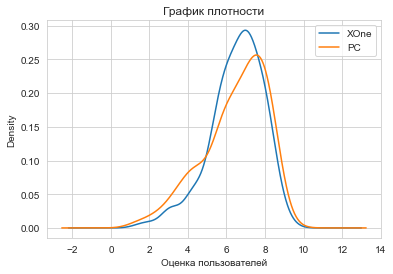

In [53]:
games_XOne['user_score'].plot(kind = 'density')
games_PC['user_score'].plot(kind= 'density')
plt.title('График плотности')
plt.xlabel('Оценка пользователей')
plt.legend(['XOne', 'PC'])
plt.grid(True)
plt.show()

Визуально распределения очень похожи, близки к нормальному, немного скошены влево, средние обеих выборок находятся в районе 7. 

Посчитаем дисперсию и воспользуемся тестом Левена  для проверки равенства дисперсий наших выборок:

In [54]:
print('Выборочная дисперсия оценок для платформы XBox One:', 
      np.var(games_XOne['user_score'], ddof = 1))
print('Выборочная дисперсия оценок для ПК:', 
      np.var(games_PC['user_score'], ddof = 1), '\n')

# тест Левена:
from scipy.stats import levene
stat, p = levene(games_XOne['user_score'], games_PC['user_score'])
print('Значение p-value для критерия Левена:', p)

Выборочная дисперсия оценок для платформы XBox One: 1.9069968429360695
Выборочная дисперсия оценок для ПК: 2.747158203565786 

Значение p-value для критерия Левена: 0.014264583982264795


Поскольку значение p-value в тесте Левена ниже уровня статистической значимости в 5%, мы не можем принять гипотезу о равенстве дисперсий двух выборок. Учтём это при проведении t-теста:

In [55]:
alpha = 0.05
results = st.ttest_ind(games_XOne['user_score'], 
                       games_PC['user_score'], 
                       equal_var = False) # дисперсии выборок отличаются, отразили это в расчёте
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем H0')
else:
    print('Не получилось отвергнуть H0')

p-значение: 0.6206366351489678
Не получилось отвергнуть H0


Значение p-value значительно выше уровня статистической значимости в 5%, а значит, у нас нет оснований отвергать нулевую гипотезу: с большой вероятностью средние значения пользовательских оценок для платформы XBox One и ПК равны.

---
**2.**  `Гипотеза H0`: средние пользовательские рейтинги жанров Action и Sports одинаковы.

`Гипотеза H1`: средние пользовательские рейтинги жанров Action и Sports различаются.

Построим распределения выборок пользовательских оценок для обоих жанров:

In [56]:
games_action = games_actual.query('user_score < 20 and genre == "Action"')
games_action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_1,total_sales_2
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,21.05,63.15
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,16.27,48.81
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,12.62,37.86
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88,6.6,E,8.17,8.17,24.51
127,Assassin's Creed III,PS3,2012,Action,2.64,2.52,0.16,1.12,85,6.9,M,6.44,6.44,19.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65,6.0,M,0.01,0.01,0.03
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81,8.5,E,0.01,0.01,0.03
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,0,5.1,E10+,0.01,0.01,0.03
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,NAN,0.01,0.01,0.03


In [57]:
games_sports = games_actual.query('user_score < 20 and genre == "Sports"')
games_sports

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_1,total_sales_2
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58,8.58,25.74
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60,7.60,22.80
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.3,E,6.46,6.46,19.38
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,5.7,E,6.08,6.08,18.24
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,0,4.5,E,4.28,4.28,12.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16146,Don Bradman Cricket 14,PS3,2014,Sports,0.00,0.01,0.00,0.00,73,6.9,E,0.01,0.01,0.03
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E,0.01,0.01,0.03
16450,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,0,4.5,E,0.01,0.01,0.03
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,0,1.4,E,0.01,0.01,0.03


Получили две выборки в 531 и 195 наблюдений. Построим графики плотности:

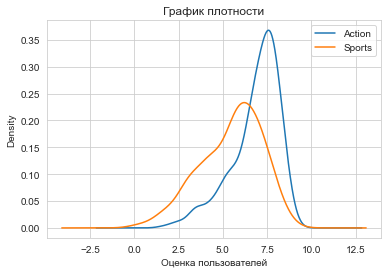

In [58]:
games_action['user_score'].plot(kind = 'density')
games_sports['user_score'].plot(kind= 'density')
plt.title('График плотности')
plt.xlabel('Оценка пользователей')
plt.legend(['Action', 'Sports'])
plt.grid(True)
plt.show()

Распределение игр в жанре Action - более узкое, со средним около 7,5 и относительно небольшой дисперсией. Распределение для спортивных игр более вариативно, среднее близко к 6. Даже визуально можно увидеть, что дисперсии выборок не равны, однако убедимся в этом с помощью расчетов:

In [59]:
print('Выборочная дисперсия оценок для игр в жанре Action:', 
      np.var(games_action['user_score'], ddof = 1))
print('Выборочная дисперсия оценок для игр в жанре Sports:', 
      np.var(games_sports['user_score'], ddof = 1), '\n')

# тест Левена:
from scipy.stats import levene
stat, p = levene(games_action['user_score'], 
                 games_sports['user_score'])
print('Значение p-value для критерия Левена:', p)

Выборочная дисперсия оценок для игр в жанре Action: 1.8819173506733466
Выборочная дисперсия оценок для игр в жанре Sports: 3.022890298704732 

Значение p-value для критерия Левена: 1.8018286275085335e-05


Расчёты подтверждают, что дисперсии выборок существенно различаются. Проведём t-тест с поправкой на различия в дисперсиях:

In [60]:
alpha = 0.05
results = st.ttest_ind(games_action['user_score'], 
                       games_sports['user_score'], 
                       equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем H0')
else:
    print('Не получилось отвергнуть H0')

p-значение: 2.337200239591976e-20
Отвергаем H0


Значение p-value значительно ниже уровня статистической значимости в 5%, а значит, нулевую гипотезу о равенстве средних двух выборок стоит отвергнуть: с большой вероятностью средние оценки пользователей игр в жанрах Action и Sports не равны.

## Вывод

Мы проанализировали данные о продажах игр на разных платформах в различных регионах с 1977 по 2016 год. В ходе анализа:
1. Выяснили, что средний жизненный цикл игровой платформы составляет около 10 лет, определили платформы, игры под которые вероятно будут продаваться в 2017 году. 
2. Проанализировали объем глобальных продаж по годам, и в целях предиктивного анализа приняли в расчёт данные с 2012 по 2016 год как наиболее соответствующие текущей тенденции. 
3. Выяснили, что рынок Японии сильно отличается от европейского и американского в части предпочтения платформ и жанров. 
4. Определили, что оценки критиков имеют не очень сильную связь с объёмами продаж игры, а оценки пользователей вообще на продажи не влияют. 
5. Мы также проверили две гипотезы о том, равны ли оценки пользователей для платформ XBox One и ПК, и различаются ли оценки пользователей для жанров Action и Sports. В результате проверки выяснили, что с большой долей вероятности можно говорить о том, что средние оценки пользователей для платформ XBox One и ПК равны, а средние оценки пользователей для жанров Action и Sports различаются. Из этого можно сделать вывод, что оценка пользователя зависит от жанра игры, но не от платформы, которую он использует.

**На 2017 год можно рекомендовать сосредоточить внимание на играх с жанре экшн, шутер, ролевых и спортивных играх, выпущенных под следующие существующие платформы: Nintendo 3DS, Sony PlayStation 4, Sony PlayStation Vita, Nintendo WiiU, Xbox One и ПК. И конечно, следить за платформами новых поколений, которые вероятно будут выпущены в скором времени. Рекламные кампании рекомендуется проводить отдельно для Японии с упором на ролевые и экшн игры под платформы компании Nintendo и Европы с Америкой с упором на игры в жанрах экшн и шутинг под платформы Sony Playstation и XBox.**    